In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
pd.set_option('display.max_columns', None)

In [46]:
%load_ext memory_profiler

In [28]:
def sm():
    """исследуемая функция"""
    sm = 0
    for i in range(1000):
        sm += i
    return sm


In [4]:
%timeit sm()

70.9 µs ± 3.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
%memit sm()

peak memory: 119.87 MiB, increment: 0.11 MiB


In [3]:
%prun sm()


In [44]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [49]:
%mprun -f sm

ERROR: Could not find file <ipython-input-28-1c6147451ae2>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.



In [5]:
%lprun -f sm()

C:\ProgramData\Anaconda3\lib\site-packages\line_profiler\line_profiler.py:344: UserWarning: Could not extract a code object for the object 499500
  profile = LineProfiler(*funcs)


In [6]:
import line_profiler
lp = line_profiler.LineProfiler()
lp.add_function(sm)
lp.runctx('sm()', locals=locals(), globals=globals())
lp.print_stats()

Timer unit: 3.3094e-07 s

Total time: 0.00104279 s
File: <ipython-input-2-4a243120c7e7>
Function: sm at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def sm():
     2         1          5.0      5.0      0.2      sm = 0
     3      1001       1508.0      1.5     47.9      for i in range(1000):
     4      1000       1637.0      1.6     52.0          sm += i
     5         1          1.0      1.0      0.0      return sm



In [39]:
arr1 = pd.DataFrame(np.random.rand(100, 100))
arr2 = pd.DataFrame(np.random.rand(100, 100))
arr3 = pd.DataFrame(np.random.rand(100, 100))

In [8]:
%%timeit
for i in range(100):
    for j in range(100):
        arr3[i][j] = arr1[i][j] / arr2[i][j]

916 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%memit
arr4 = arr1 / arr2

peak memory: 122.59 MiB, increment: 0.57 MiB


In [43]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %lprun  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %

In [42]:
?arr1.add

In [156]:
df = pd.DataFrame(np.random.normal(size=(1000, 3)),
                                columns=['a', 'b', 'c'])
df.head()

,a,b,c
0,0.029219,-2.903424,-0.500705
1,-0.581401,-0.691049,0.618647
2,1.048681,-1.142982,0.863099
3,-0.674633,0.932612,-0.234586
4,-0.226700,0.619903,0.233450


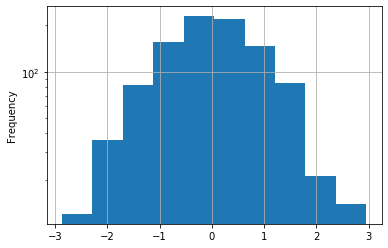

In [127]:
df.b.plot(kind='hist', logy=True, grid=True);

In [51]:
pd.to_datetime(1434340848, unit='s')

Timestamp('2015-06-15 04:00:48')

In [81]:
df.loc[(df.a < -1) & (df.b > 1), 'c']

31   -0.573576
35    0.318506
88    0.095291
Name: c, dtype: float64

In [105]:
import scipy

In [132]:
scipy.stats.shapiro(df)

(0.9995960593223572, 0.8290085792541504)

In [131]:
scipy.stats.normaltest(df)

NormaltestResult(statistic=array([4.10452135, 0.76544463, 1.78599902]), pvalue=array([0.1284442 , 0.68200226, 0.40942583]))

In [172]:
scipy.stats.ttest_ind(df.a[:500], df.a[500:])

Ttest_indResult(statistic=-0.00378764875375555, pvalue=0.9969786577148051)

In [194]:
df['d'] = df.a + 0.1 * abs(df.b)
df

,a,b,c,d
0,0.029219,-2.903424,-0.500705,0.319561
1,-0.581401,-0.691049,0.618647,-0.512296
2,1.048681,-1.142982,0.863099,1.162979
3,-0.674633,0.932612,-0.234586,-0.581372
4,-0.226700,0.619903,0.233450,-0.164710
...,...,...,...,...
995,-0.810591,-1.918957,0.458101,-0.618696
996,0.230917,1.234558,-1.935713,0.354372
997,-0.606310,-2.342535,-0.613960,-0.372057
998,0.238668,0.246697,-0.116900,0.263338


In [195]:
scipy.stats.ttest_rel(df['a'], df['d'])

Ttest_relResult(statistic=-41.670442565038016, pvalue=9.760891545699535e-221)

In [198]:
np.mgrid[-3:3:7j, -3:3:7j]

array([[[-3., -3., -3., -3., -3., -3., -3.],
        [-2., -2., -2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.,  3.,  3.]],

       [[-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.]]])

In [205]:
arr = np.arange(6)
arr.resize(2, 3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [206]:
df['e'] = df['d'] / 0
df

,a,b,c,d,e
0,0.029219,-2.903424,-0.500705,0.319561,inf
1,-0.581401,-0.691049,0.618647,-0.512296,-inf
2,1.048681,-1.142982,0.863099,1.162979,inf
3,-0.674633,0.932612,-0.234586,-0.581372,-inf
4,-0.226700,0.619903,0.233450,-0.164710,-inf
...,...,...,...,...,...
995,-0.810591,-1.918957,0.458101,-0.618696,-inf
996,0.230917,1.234558,-1.935713,0.354372,inf
997,-0.606310,-2.342535,-0.613960,-0.372057,-inf
998,0.238668,0.246697,-0.116900,0.263338,inf


In [211]:
np.random.randint(0, 10, size=100)

array([8, 3, 0, 5, 1, 6, 5, 3, 6, 6, 3, 0, 7, 2, 6, 7, 1, 7, 0, 7, 2, 7,
       1, 2, 3, 8, 3, 3, 1, 0, 0, 1, 4, 3, 8, 9, 9, 6, 5, 8, 6, 0, 8, 0,
       8, 2, 9, 6, 0, 0, 6, 3, 4, 8, 2, 2, 4, 5, 3, 2, 9, 5, 7, 0, 4, 7,
       9, 6, 0, 9, 8, 2, 3, 8, 2, 1, 1, 4, 9, 5, 7, 1, 5, 7, 5, 7, 2, 0,
       8, 1, 7, 6, 6, 5, 2, 0, 1, 0, 9, 5])

In [7]:
from tqdm import tqdm
import time

pbar = tqdm(["a","b","c","d", "e", "f", "g"])
for c in pbar:
    if c == 'c':
        time.sleep(1.5)
    time.sleep(0.5)
    pbar.set_description("Processing %s"%c)

Processing g: 100%|██████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.38it/s]


In [4]:
from tqdm.notebook import tqdm
import time

#totalParameter установка общей длины индикатора выполнения
with tqdm(total=100) as pbar:
  for i in range(100):
    time.sleep(0.05)
    # Обновлять длину индикатора выполнения каждый раз
    pbar.update(1)

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

df = pd.DataFrame(np.random.randint(0, 100, (10000000, 6)))

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
# (can use `tqdm.gui.tqdm`, `tqdm.notebook.tqdm`, optional kwargs, etc.)
# tqdm.pandas(desc="my bar!")
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
df.progress_apply(lambda x: x**2)
# can also groupby:
# df.groupby(0).progress_apply(lambda x: x**2)

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,0,1,2,3,4,5
0,6561,6561,961,5041,64,2500
1,4624,7225,4,1156,7396,1024
2,1296,7744,5184,0,2304,8464
3,5929,5776,1849,7225,8464,1225
4,9,6561,49,8100,441,121
...,...,...,...,...,...,...
9999995,7921,36,100,676,441,3844
9999996,9216,7056,5184,441,2500,484
9999997,4356,256,196,2916,4356,0
9999998,361,2025,324,36,4096,9604


In [3]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

In [5]:
pd.DataFrame(np.random.randint(0, 11, (3, 3)), columns=list('ABC'))

,A,B,C
0,4,1,4
1,5,1,4
2,9,7,2


In [14]:
df = pd.DataFrame({'gender': np.random.choice(['m', 'f'], size=50), 'math_score': np.random.randint(0, 101, 50)})
df

,gender,math_score
0,f,61
1,f,63
2,f,52
3,f,67
4,m,92
5,m,19
6,m,74
7,f,3
8,m,98
9,m,40


In [18]:
df.sort_values(['gender','math_score'], ascending=[True, False])\
    .groupby('gender')\
    .head(5)

,gender,math_score
44,f,97
49,f,96
10,f,93
18,f,90
20,f,89
16,m,100
8,m,98
21,m,98
26,m,94
4,m,92


In [21]:
df.values.nbytes

800

In [33]:
df = pd.DataFrame(np.random.randint(0, 100, (10000, 100)))

In [4]:
from tqdm import tqdm
tqdm.pandas()

In [35]:
df.progress_applymap(lambda x: np.sin(x))
# progress_map()

100%|████████████████████████████| 1000000/1000000 [00:04<00:00, 209149.29it/s]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.992873,-0.536573,0.017702,0.670229,0.920026,-0.026551,0.296369,-0.905578,0.412118,-0.966118,...,0.963795,0.893997,0.901788,0.762558,0.999912,-0.544021,-0.245252,0.656987,-0.676772,0.986628
1,-0.132352,0.017702,-0.750987,-0.993889,-0.756802,0.656987,0.436165,0.551427,-0.993889,-0.916522,...,0.656987,-0.831775,-0.676772,-0.905578,0.989358,-0.428183,0.436165,0.999520,0.412118,0.992873
2,-0.905578,-0.831775,0.986628,0.395925,0.296369,-0.558789,-0.821818,0.395925,-0.404038,0.762558,...,0.733190,0.826829,0.989358,-0.304811,0.826829,-0.176076,-0.643538,0.968364,0.149877,-0.756802
3,-0.444113,-0.245252,0.513978,-0.821818,0.745113,0.990607,0.920026,0.566108,0.850904,-0.905578,...,0.105988,0.270906,0.395925,0.983588,-0.923458,-0.158623,0.551427,0.270906,-0.245252,0.826829
4,0.986628,-0.287903,0.513978,-0.750987,-0.428183,-0.855520,-0.026551,-0.176076,-0.026551,0.656987,...,-0.768255,-0.905578,-0.961397,-0.821818,-0.245252,-0.132352,-0.287903,-0.573382,0.773891,0.860069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.132352,0.149877,0.683262,-0.008851,0.035398,-0.521551,-0.999990,-0.663634,0.990607,0.105988,...,-0.966118,-0.404038,0.650288,0.529083,-0.387782,-0.855520,-0.643538,-0.916522,-0.158623,0.745113
9996,0.912945,-0.750987,0.412118,0.636738,-0.993889,-0.279415,-0.676772,-0.404038,-0.739181,-0.404038,...,0.893997,-0.245252,-0.114785,-0.629888,-0.026551,-0.544021,-0.831775,-0.846220,0.253823,-0.953753
9997,-0.916522,-0.988032,-0.663634,-0.831775,0.999520,0.893997,-0.262375,-0.629888,-0.988032,-0.988032,...,0.000000,-0.132352,0.566108,-0.387782,-0.821818,0.920026,-0.663634,-0.750987,0.951055,0.566108
9998,0.762558,-0.629888,-0.279415,0.017702,-0.676772,-0.132352,0.035398,-0.573382,0.836656,0.841471,...,-0.262375,-0.521551,-0.287903,0.956376,0.893997,0.683262,-0.988032,-0.008851,0.270906,0.745113


In [31]:
df[0].progress_map(lambda x: np.sin(x))

100%|████████████████████████████████| 10000/10000 [00:00<00:00, 161280.93it/s]


0       0.683262
1      -0.923458
2      -0.999755
3      -0.387782
4      -0.993889
          ...   
9995   -0.993889
9996   -0.026551
9997    0.683262
9998   -0.905578
9999   -0.026551
Name: 0, Length: 10000, dtype: float64

In [6]:
def palindrome_check(s):
    return s == s[::-1]

palindrome_check('dsfgads')

False

In [12]:
def anagram_check(s1, s2):
    return sorted(s1.lower()) == sorted(s2.lower())

anagram_check('песнь', 'снедь')

False

In [20]:
def rle_encode(s):
    answer = ''
    char_now = s[0]
    char_amount = 1

    for char in s[1:]:
        if char == char_now:
            char_amount += 1
        else:
            answer += str(char_amount) + char_now
            char_now = char
            char_amount = 1
    
    answer += str(char_amount) + char_now
    char_now = char
    char_amount = 1
    
    return answer

rle_encode('WWWWWWWWWBBBWWWWWWWWWWWWWWWWWWWWWWWWBWWWWWWWWWWWWWW')

'9W3B24W1B14W'

In [1]:
def print_hello(name: str, upper: bool = False) -> None:
    print(f'Hello, {name}')
# def __init__(self, x: int, y: int) -> None:


title: str
name: str = 'John'

name = 10
title = [2, 5]

print(name)
print_hello(name)

10
Hello, 10


In [3]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [6]:
q_1, q_3 = df.distance.quantile([0.25, 0.75])

In [7]:
diff_3_1 = q_3 - q_1 
up_thresh = q_3 + 1.5 * diff_3_1
low_thresh = q_1 - 1.5 * diff_3_1
low_thresh, up_thresh

(-2.3649999999999998, 6.555)

In [8]:
df.distance[(df.distance > low_thresh) * (df.distance < up_thresh)]

0       1.60
1       0.79
2       1.37
4       2.16
5       0.49
        ... 
6426    0.71
6428    0.75
6430    4.14
6431    1.12
6432    3.85
Name: distance, Length: 5699, dtype: float64

In [4]:
df = df.loc[:, 'distance':'total'].copy()

In [5]:
standard_deviations = 3
df1 = df[df.apply(lambda x: (x - x.mean()).abs() / x.std() < standard_deviations).all(axis=1)]

In [6]:
df1

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30
2,1.37,7.5,2.36,0.0,14.16
3,7.70,27.0,6.15,0.0,36.95
4,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...
6427,7.07,20.0,0.00,0.0,20.00
6428,0.75,4.5,1.06,0.0,6.36
6430,4.14,16.0,0.00,0.0,17.30
6431,1.12,6.0,0.00,0.0,6.80


In [27]:
standard_deviations = 3
df2 = df[df.transform(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations).all(axis=1)]

In [28]:
df2

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30
2,1.37,7.5,2.36,0.0,14.16
3,7.70,27.0,6.15,0.0,36.95
4,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...
6427,7.07,20.0,0.00,0.0,20.00
6428,0.75,4.5,1.06,0.0,6.36
6430,4.14,16.0,0.00,0.0,17.30
6431,1.12,6.0,0.00,0.0,6.80


In [30]:
(df1 == df2).all().all()

True

In [7]:
from scipy.stats import zscore
df1 = df[(zscore(df).abs() < 3).all(axis=1)]

In [8]:
df1

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30
2,1.37,7.5,2.36,0.0,14.16
3,7.70,27.0,6.15,0.0,36.95
4,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...
6427,7.07,20.0,0.00,0.0,20.00
6428,0.75,4.5,1.06,0.0,6.36
6430,4.14,16.0,0.00,0.0,17.30
6431,1.12,6.0,0.00,0.0,6.80


In [36]:
df3 = df.loc[:10].copy()
df4 = df3.loc[:1]
df5 = df3.loc[:1]

In [38]:
df4

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30


In [39]:
df5

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30


In [40]:
df4.loc[0, 'distance'] = 100500
df4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,distance,fare,tip,tolls,total
0,100500.00,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30


In [42]:
df5

,distance,fare,tip,tolls,total
0,100500.00,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30


In [43]:
df4 is df5

False

In [19]:
x = np.linspace(0, 10, 1000)
y1 = np.sin(x)
y2 = 100 * np.tan(x)

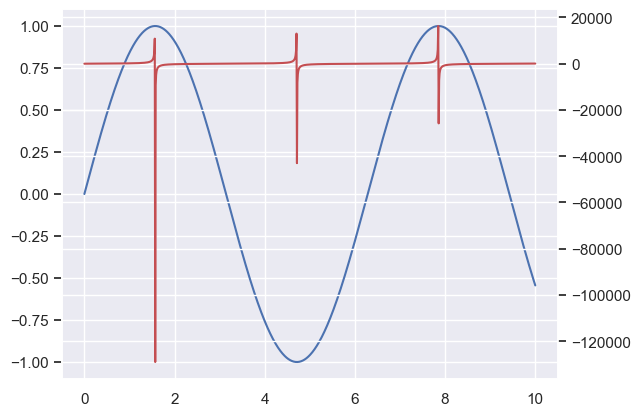

In [20]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax2 = ax.twinx()
ax2.plot(x, y2, color='r');

In [3]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [6]:
df.head(10).style.background_gradient()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.600000,7.000000,2.150000,0.000000,12.950000,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.790000,5.000000,0.000000,0.000000,9.300000,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.370000,7.500000,2.360000,0.000000,14.160000,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.700000,27.000000,6.150000,0.000000,36.950000,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.160000,9.000000,1.100000,0.000000,13.400000,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.490000,7.500000,2.160000,0.000000,12.960000,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.650000,13.000000,2.000000,0.000000,18.800000,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.400000,8.500000,0.000000,0.000000,11.800000,yellow,nan,Murray Hill,Flatiron,Manhattan,Manhattan
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.630000,15.000000,1.000000,0.000000,19.300000,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.520000,8.000000,1.000000,0.000000,13.300000,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan


In [9]:
df.head(10).style.bar(subset=['distance', 'total'], color='#d65f5f', align='mid')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.600000,7.000000,2.150000,0.000000,12.950000,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.790000,5.000000,0.000000,0.000000,9.300000,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.370000,7.500000,2.360000,0.000000,14.160000,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.700000,27.000000,6.150000,0.000000,36.950000,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.160000,9.000000,1.100000,0.000000,13.400000,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.490000,7.500000,2.160000,0.000000,12.960000,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.650000,13.000000,2.000000,0.000000,18.800000,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.400000,8.500000,0.000000,0.000000,11.800000,yellow,nan,Murray Hill,Flatiron,Manhattan,Manhattan
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.630000,15.000000,1.000000,0.000000,19.300000,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.520000,8.000000,1.000000,0.000000,13.300000,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan


Вам необходимо:
- Объединить все датафреймы в один
- Удалить строки, где есть хотя бы один пропуск
- Добавить строку Mean в конец датафрейма, в которой будет рассчитано среднее значение по каждому из столбцов

In [1]:
import pandas as pd

In [2]:
df1 = [
    {'page1': 1, 'page2': 25, 'page3': 3}, 
    {'page1': 4, 'page2': 58, 'page3': 1}, 
    {'page1': 1.5, 'page2': 8, 'page3': 0.5}
    ]

df2 = [
     {'page1': 2, 'page2': 11, 'page3': None}, 
     {'page1': 5, 'page2': 21, 'page3': 5}, 
     {'page1': 0.1, 'page2': 38, 'page3': 15}
     ]

df3 = [
     {'page1': 2, 'page2': 11, 'page3': 40}, 
     {'page1': 5, 'page2': 15, 'page3': None}, 
     {'page1': 4, 'page2': 21, 'page3': 13}
     ]

df1, df2, df3 = [pd.DataFrame(df) for df in [df1, df2, df3]]

In [10]:
df = pd.concat((df1, df2, df3)).reset_index(drop=True)
df

,page1,page2,page3
0,1.0,25,3.0
1,4.0,58,1.0
2,1.5,8,0.5
3,2.0,11,NaN
4,5.0,21,5.0
5,0.1,38,15.0
6,2.0,11,40.0
7,5.0,15,NaN
8,4.0,21,13.0


In [12]:
df = df.dropna()

In [15]:
df.loc['Mean'] = (df.page1.mean(), df.page1.mean(), df.page1.mean())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [16]:
df

,page1,page2,page3
0,1.000000,25.000000,3.000000
1,4.000000,58.000000,1.000000
2,1.500000,8.000000,0.500000
4,5.000000,21.000000,5.000000
5,0.100000,38.000000,15.000000
6,2.000000,11.000000,40.000000
8,4.000000,21.000000,13.000000
Mean,2.514286,2.514286,2.514286


In [19]:
class Answer:
    def calcMean(self, df1, df2, df3):
        df = pd.concat((df1, df2, df3))
        df = df.dropna()
        df.loc['Mean'] = (df.page1.mean(), df.page2.mean(), df.page3.mean())
        return df

In [20]:
ans = Answer()
ans.calcMean(df1, df2, df3)

,page1,page2,page3
0,1.000000,25.0,3.000000
1,4.000000,58.0,1.000000
2,1.500000,8.0,0.500000
1,5.000000,21.0,5.000000
2,0.100000,38.0,15.000000
0,2.000000,11.0,40.000000
2,4.000000,21.0,13.000000
Mean,2.514286,26.0,11.071429
